In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from model import _build_model
from core import Graph

import sys 
from ruixuan.turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle
import math
from collections import deque
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from tabulate import tabulate
from utils import Gibbs_sampling, get_smoothness, get_distance_pt
from config import Config
from visualizer import plot_scene_on_grid
import itertools

In [ ]:
# new a graph  
env = Graph()
sample = env.sample
# act/plan the 10 steps

# add use the history info in target to sample

# visualize the sample

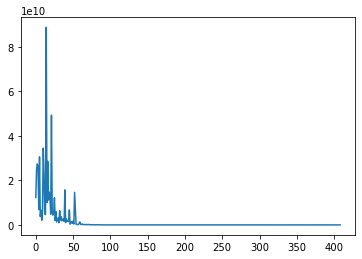

In [459]:
import matplotlib.pyplot as plt
import numpy as np
# reward_history = np.load('episode_history_collision_g2.npy', allow_pickle=True)
# reward_history = np.load('simple_model2_episode_history.npy', allow_pickle=True) 
# reward_history = np.load('simple_model_episode_history_lowc.npy', allow_pickle=True)
# reward_history = np.load('rightturn_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through_episode_history.npy', allow_pickle=True)
# reward_history = np.load('through2_episode_history.npy', allow_pickle=True) 
# reward_history = np.load('guided_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided2_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3x_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3y_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3a_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3z_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('guided3y1_exp_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model4_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model6_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model5_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model7_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model8_thru_episode_history.npy', allow_pickle=True)
reward_history = np.load('model9_all_episode_history.npy', allow_pickle=True)[1000:]
# reward_history = np.load('model8a_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('model8b_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('modelx_thru_episode_history.npy', allow_pickle=True)
# reward_history = np.load('modelx1_thru_episode_history.npy', allow_pickle=True)
x=[]
step=1000
for i in range(0, len(reward_history), step):
    x.append(sum(reward_history[i:i+step])/step)
# print(x.shape)
plt.plot(range(len(x)), x)
plt.show()

In [351]:
# import itertools
# a=list(itertools.product(np.round(np.arange(-0.1,0.15,0.05), decimals=2), np.round(np.arange(-3,4,1), decimals=0)))
# print(len(a),'\n' ,a)

In [439]:
epsilon_min = 0.1
epsilon_max = 1.0  # Maximum epsilon greedy parameter
epsilon = 1
epsilon_interval = (
    epsilon_max - epsilon_min
)
print(epsilon_interval)
i=0
while i<700000: 
    epsilon -= epsilon_interval / 1000000
    i+=1
print(epsilon)
epsilon = max(epsilon, epsilon_min)
print(epsilon , np.random.rand(1)[0])

0.9
0.37000000001272343
0.37000000001272343 0.7209946046574617
